In [1]:
# import liararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load the dataset

df = pd.read_excel('2021-average-values-2.xlsx')
df.head()

,File Name,Median Number of Roots,Maximum Number of Roots,Number of Root Tips,Total Root Length,Depth,Maximum Width,Width-to-Depth Ratio,Network Area,Convex Area,...,Average Hole Size,Computation Time,Average Root Orientation,Shallow Angle Frequency,Medium Angle Frequency,Steep Angle Frequency,Fine Diameter Frequency,Medium Diameter Frequency,Coarse Diameter Frequency,Unnamed: 28
0,E-1,1.333333,7.666667,72.000000,6027.346667,1942.666667,642.333333,0.337494,114327.6667,6.081240e+05,...,1061.477667,0.149667,58.222633,0.184488,0.236488,0.579024,0.118654,0.274584,0.606762,NaN
1,E-2,1.666667,8.666667,89.666667,6124.556667,1498.666667,413.333333,0.271225,107012.3333,4.023363e+05,...,813.093333,0.120333,57.090933,0.235690,0.182359,0.581951,0.140089,0.300210,0.559701,NaN
2,e-5,3.000000,13.500000,156.500000,10633.905000,1523.000000,866.500000,0.564773,110906.5000,8.282115e+05,...,2237.943000,0.162500,53.098600,0.241076,0.293106,0.465817,0.197978,0.325394,0.476629,NaN
3,E-7,3.000000,11.666667,197.666667,15029.363330,2025.000000,1035.666667,0.544554,168416.3333,1.075985e+06,...,765.552333,0.212667,55.718767,0.201371,0.264966,0.533662,0.188319,0.259664,0.552017,NaN
4,E-8,2.000000,9.666667,65.000000,7596.116667,1540.000000,1108.000000,0.710880,120945.6667,9.596013e+05,...,2421.893667,0.181000,54.126167,0.215357,0.301807,0.482837,0.107015,0.311955,0.581030,NaN


In [3]:
df.shape

(185, 29)

In [4]:
df.describe()

,Median Number of Roots,Maximum Number of Roots,Number of Root Tips,Total Root Length,Depth,Maximum Width,Width-to-Depth Ratio,Network Area,Convex Area,Solidity,...,Average Hole Size,Computation Time,Average Root Orientation,Shallow Angle Frequency,Medium Angle Frequency,Steep Angle Frequency,Fine Diameter Frequency,Medium Diameter Frequency,Coarse Diameter Frequency,Unnamed: 28
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,1.0
mean,2.399099,11.525225,141.820721,11933.247477,1753.645946,814.520721,0.478679,167571.514415,8.864781e+05,0.224655,...,1622.862367,0.199382,54.029838,0.230688,0.263570,0.503941,0.121137,0.262031,0.615030,0.0
std,1.102820,4.528189,90.233658,7155.497424,408.193505,242.718335,0.129858,65380.137007,4.006989e+05,0.079528,...,1538.397288,0.054840,4.047666,0.045298,0.041083,0.071346,0.051397,0.061943,0.106588,NaN
min,1.000000,3.500000,23.500000,2281.330000,780.500000,294.500000,0.242168,63473.333330,1.662795e+05,0.099182,...,55.400000,0.105000,32.820667,0.125164,0.158050,0.276917,0.019757,0.071812,0.414036,0.0
25%,1.500000,8.000000,65.000000,6075.723333,1513.000000,654.500000,0.386191,120945.666700,5.891710e+05,0.169337,...,758.909000,0.157000,51.764833,0.200044,0.238538,0.462944,0.076892,0.226631,0.522134,0.0
50%,2.333333,11.000000,125.000000,10633.905000,1760.500000,811.666667,0.449495,155233.333300,8.450835e+05,0.207391,...,1107.733000,0.199000,54.266033,0.227105,0.261708,0.505087,0.121975,0.266893,0.607881,0.0
75%,3.000000,14.666667,193.666667,15969.183330,2056.000000,980.000000,0.569636,205402.000000,1.191514e+06,0.255786,...,1933.233333,0.237667,56.446267,0.256261,0.289644,0.544209,0.159690,0.311955,0.687508,0.0
max,6.666667,26.666667,436.666667,41320.866670,2544.000000,1631.000000,0.957264,435357.333300,2.120000e+06,0.536590,...,11418.500000,0.407667,64.810000,0.397963,0.430041,0.693528,0.242243,0.383006,0.897199,0.0


In [5]:
df.isnull().sum()

File Name                      0
Median Number of Roots         0
Maximum Number of Roots        0
Number of Root Tips            0
Total Root Length              0
Depth                          0
Maximum Width                  0
Width-to-Depth Ratio           0
Network Area                   0
Convex Area                    0
Solidity                       0
Lower Root Area                0
Average Diameter               0
Median Diameter                0
Maximum Diameter               0
Perimeter                      0
Volume                         0
Surface Area                   0
Holes                          0
Average Hole Size              0
Computation Time               0
Average Root Orientation       0
Shallow Angle Frequency        0
Medium Angle Frequency         0
Steep Angle Frequency          0
Fine Diameter Frequency        0
Medium Diameter Frequency      0
Coarse Diameter Frequency      0
Unnamed: 28                  184
dtype: int64

In [6]:
df_clean=df.drop('Unnamed: 28',axis=1)

In [7]:
df_clean.head()

,File Name,Median Number of Roots,Maximum Number of Roots,Number of Root Tips,Total Root Length,Depth,Maximum Width,Width-to-Depth Ratio,Network Area,Convex Area,...,Holes,Average Hole Size,Computation Time,Average Root Orientation,Shallow Angle Frequency,Medium Angle Frequency,Steep Angle Frequency,Fine Diameter Frequency,Medium Diameter Frequency,Coarse Diameter Frequency
0,E-1,1.333333,7.666667,72.000000,6027.346667,1942.666667,642.333333,0.337494,114327.6667,6.081240e+05,...,15.666667,1061.477667,0.149667,58.222633,0.184488,0.236488,0.579024,0.118654,0.274584,0.606762
1,E-2,1.666667,8.666667,89.666667,6124.556667,1498.666667,413.333333,0.271225,107012.3333,4.023363e+05,...,21.666667,813.093333,0.120333,57.090933,0.235690,0.182359,0.581951,0.140089,0.300210,0.559701
2,e-5,3.000000,13.500000,156.500000,10633.905000,1523.000000,866.500000,0.564773,110906.5000,8.282115e+05,...,72.000000,2237.943000,0.162500,53.098600,0.241076,0.293106,0.465817,0.197978,0.325394,0.476629
3,E-7,3.000000,11.666667,197.666667,15029.363330,2025.000000,1035.666667,0.544554,168416.3333,1.075985e+06,...,93.666667,765.552333,0.212667,55.718767,0.201371,0.264966,0.533662,0.188319,0.259664,0.552017
4,E-8,2.000000,9.666667,65.000000,7596.116667,1540.000000,1108.000000,0.710880,120945.6667,9.596013e+05,...,16.333333,2421.893667,0.181000,54.126167,0.215357,0.301807,0.482837,0.107015,0.311955,0.581030


In [8]:
corr=df_clean.corr()

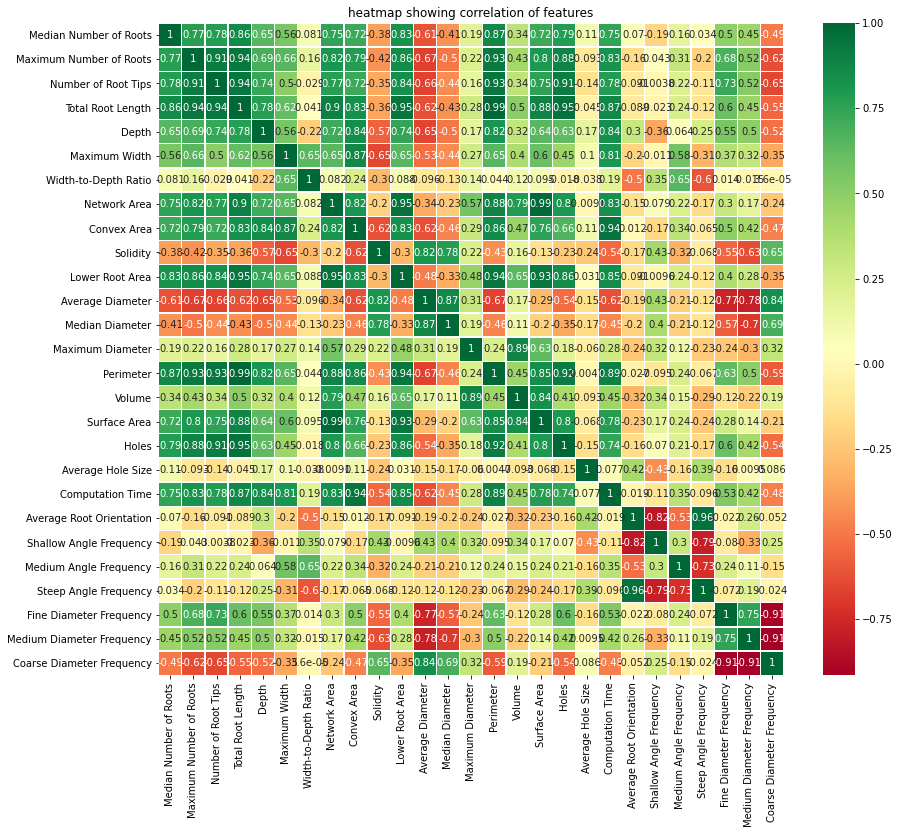

In [9]:
plt.figure(figsize=(14,12))

sns.heatmap(corr,cmap='RdYlGn',linewidths=0.30,annot=True)
plt.title('heatmap showing correlation of features')
plt.show()

In [10]:
# separating the features

In [11]:
#features = ['Median Number of Roots','Maximum Number of Roots','Number of Root Tips','Total Root Length','Depth',
#           'Maximum Width','Width-to-Depth Ratio','Network Area','Convex Area','Solidity','Average Diameter','Coarse Diameter Frequency',
#          'Shallow Angle Frequency']

In [12]:
features = ['Median Number of Roots','Width-to-Depth Ratio','Network Area','Convex Area','Solidity','Average Diameter','Coarse Diameter Frequency',
           'Shallow Angle Frequency','Surface Area','Median Diameter']

In [13]:
# Separating out the features
x = df_clean.loc[:, features].values

In [14]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [15]:
x_df = pd.DataFrame(x, columns=features)

In [16]:
x_df.rename(columns = {'Median Number of Roots':'mr', 'Width-to-Depth Ratio':'wdr',
                              'Network Area':'na','Convex Area':'ca',
                      'Average Diameter':'ad','Coarse Diameter Frequency':'cdf',
                     'Shallow Angle Frequency':'saf','Surface Area':'sa','Median Diameter':'md',
                      'Solidity':'s'}, inplace = True)

In [17]:
x_df.head()

,mr,wdr,na,ca,s,ad,cdf,saf,sa,md
0,-0.969023,-1.090178,-0.816583,-0.696557,-0.477598,-0.117457,-0.077779,-1.022674,-0.904586,-0.309982
1,-0.665947,-1.601887,-0.928776,-1.211522,1.449217,0.256270,-0.520497,0.110721,-0.830987,0.027421
2,0.546355,0.664786,-0.869053,-0.145807,-1.102792,-1.037254,-1.301992,0.229963,-0.854878,-0.608229
3,0.546355,0.508668,0.012957,0.474223,-0.962744,-1.025764,-0.592790,-0.648941,-0.128661,-0.450263
4,-0.362872,1.792979,-0.715085,0.182984,-1.235696,-0.475942,-0.319855,-0.339365,-0.809215,-0.466529


In [18]:
np.mean(x),np.std(x) # mean is near 0 and std dev is 1 after standarizing

(3.7447522560329604e-17, 1.0)

In [19]:
pca = PCA(n_components=2)

In [20]:
principalComponents = pca.fit_transform(x)

In [21]:
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [22]:
principal_df.head()

,pc1,pc2
0,0.728773,-1.964441
1,1.822482,-0.966458
2,-1.084472,-1.651386
3,-1.579922,-0.871088
4,-0.560357,-1.403790


In [23]:
# explained variance plot

In [24]:
principal_df.insert(0, 'ID', range(1,len(principal_df)+1))

In [25]:
principal_df['ID'] = 'e-' + principal_df['ID'].astype(str) # adding prefix

In [26]:
principal_df.head()

,ID,pc1,pc2
0,e-1,0.728773,-1.964441
1,e-2,1.822482,-0.966458
2,e-3,-1.084472,-1.651386
3,e-4,-1.579922,-0.871088
4,e-5,-0.560357,-1.403790


In [27]:
print('Explained variation ratio per principal component: {}'.format(pca.explained_variance_ratio_))
print('Explained variance per principal component: {}'.format(pca.explained_variance_))

Explained variation ratio per principal component: [0.49743412 0.22557475]
Explained variance per principal component: [5.00137569 2.26800702]


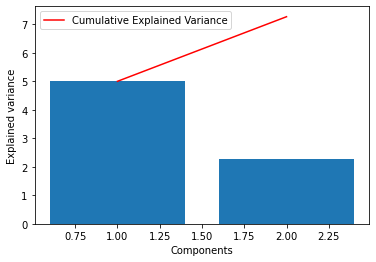

In [28]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [29]:
per_var=pca.explained_variance_ratio_

In [30]:
exp_var=pca.explained_variance_ 

In [31]:
# explained_variance_ratio

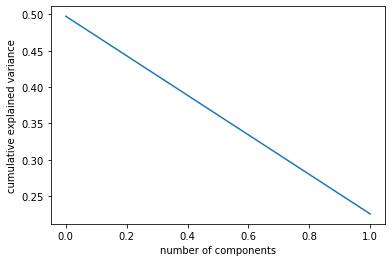

In [32]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

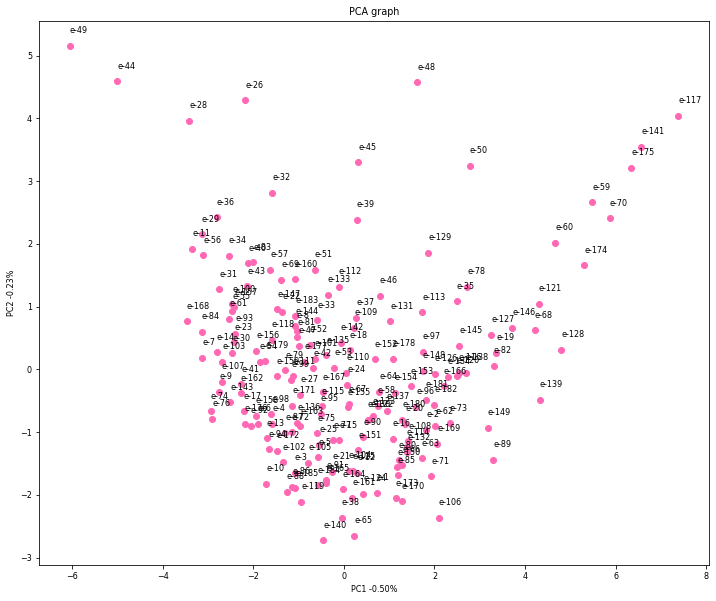

In [56]:
plt.figure(figsize=(12,10))
plt.scatter(principal_df.pc1,principal_df.pc2,color = 'hotpink')

for i in range(len(principal_df.ID)):
    plt.annotate(principal_df.ID[i], (principal_df.pc1[i], principal_df.pc2[i] + 0.2))
    
plt.title('PCA graph')

plt.xlabel('PC1 -{0:.2f}%'.format(per_var[0]))
plt.ylabel('PC2 -{0:.2f}%'.format(per_var[1]))


plt.show()

In [35]:
# ax = sns.heatmap(pca.components_,
#                  cmap='YlGnBu',
#                  yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
#                  xticklabels=list(x.columns),
#                  cbar_kws={"orientation": "horizontal"})
# ax.set_aspect("equal")

In [36]:
from mpl_toolkits.mplot3d import Axes3D

In [37]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3'])

In [38]:
principal_df.insert(0, 'ID', range(1,len(principal_df)+1))
principal_df['ID'] = 'e-' + principal_df['ID'].astype(str) # adding prefix

In [39]:
principal_df.head()

,ID,pc1,pc2,pc3
0,e-1,0.728773,-1.964441,-0.825712
1,e-2,1.822482,-0.966458,-1.277186
2,e-3,-1.084472,-1.651386,1.156849
3,e-4,-1.579922,-0.871088,0.364016
4,e-5,-0.560357,-1.403790,1.928739


In [40]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.49743412 0.22557475 0.12660346]


In [41]:
per_var=pca.explained_variance_ratio_

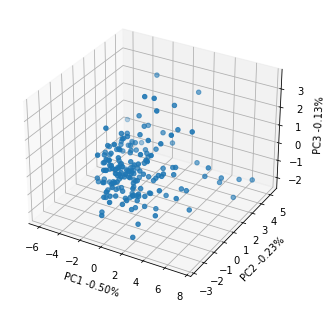

In [42]:

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(principal_df.pc1, principal_df.pc2, principal_df.pc3)



ax.set_xlabel('PC1 -{0:.2f}%'.format(per_var[0]))
ax.set_ylabel('PC2 -{0:.2f}%'.format(per_var[1]))
ax.set_zlabel('PC3 -{0:.2f}%'.format(per_var[2]))

plt.show()

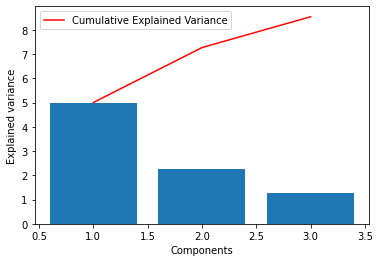

In [43]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [44]:
principal_df.head()

,ID,pc1,pc2,pc3
0,e-1,0.728773,-1.964441,-0.825712
1,e-2,1.822482,-0.966458,-1.277186
2,e-3,-1.084472,-1.651386,1.156849
3,e-4,-1.579922,-0.871088,0.364016
4,e-5,-0.560357,-1.403790,1.928739


In [45]:
pca.components_[0:2, :]

array([[-0.36176819, -0.07830809, -0.31050603, -0.39068543,  0.3459972 ,
         0.39912223,  0.33433039,  0.14475921, -0.28787207,  0.34543818],
       [ 0.2086848 ,  0.10773294,  0.45575291,  0.20560339,  0.29700076,
         0.25166982,  0.24152702,  0.3968921 ,  0.48610413,  0.30192349]])

10


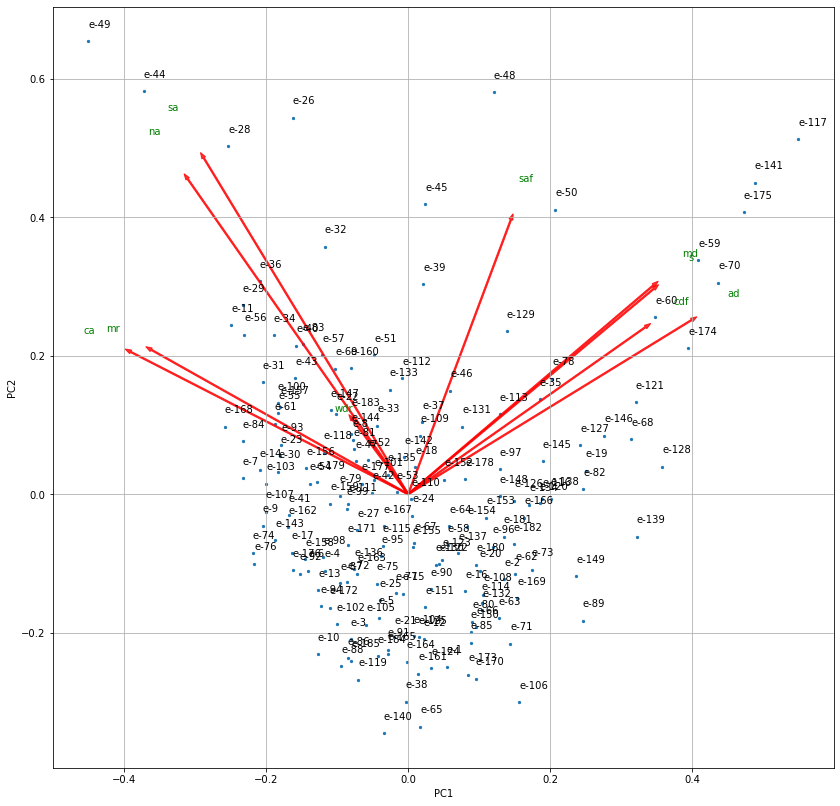

In [75]:
def myplot(score,coeff,df,labels=None):
    MEDIUM_SIZE = 10
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    print(n)
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(14,14))
    plt.rc('font', size=MEDIUM_SIZE)
    
        
    plt.scatter(xs * scalex,ys * scaley,s=5)
    
    for i in range(len(df.ID)):
        plt.annotate(df.ID[i], (df.pc1[i]*scalex,df.pc2[i]*scaley + 0.02))
    
    
        
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8,width=0.002)
        if labels is None:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.05, color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.savefig("plant_root.png")

myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]),principal_df,list(x_df.columns))
plt.show()

In [51]:
principal_df.ID

0        e-1
1        e-2
2        e-3
3        e-4
4        e-5
       ...  
180    e-181
181    e-182
182    e-183
183    e-184
184    e-185
Name: ID, Length: 185, dtype: object

In [70]:
pca.components_

array([[-0.36176819, -0.07830809, -0.31050603, -0.39068543,  0.3459972 ,
         0.39912223,  0.33433039,  0.14475921, -0.28787207,  0.34543818],
       [ 0.2086848 ,  0.10773294,  0.45575291,  0.20560339,  0.29700076,
         0.25166982,  0.24152702,  0.3968921 ,  0.48610413,  0.30192349],
       [-0.16593523,  0.81213641, -0.14698527,  0.01871093, -0.23997038,
        -0.02790812, -0.01580449,  0.45584229, -0.11846981, -0.10248643]])